### Map Projection 2: MPJ260S

#### ~ Basic Assignment 4: *11 Questions!*

##### Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import pyproj

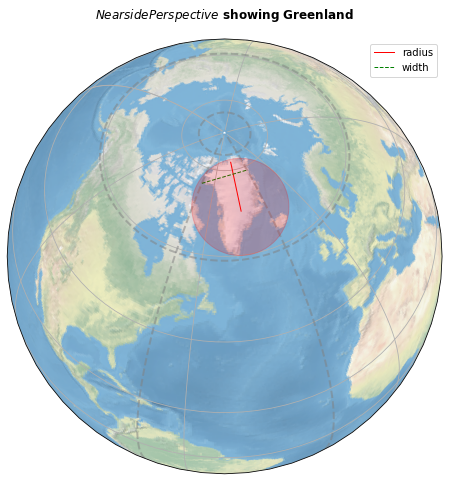

In [9]:
def plot(ax, **kwargs):
    ax.set_global()
    ax.stock_img()
    #ax.coastlines(resolution='50m')
    ax.gridlines()

fig = plt.figure(figsize=(12, 8))

central_lon, central_lat = -50, 60
proj = ccrs.NearsidePerspective(central_lon, central_lat, satellite_height=35785831)
                                                                                        
ax = plt.axes(projection=proj)
plt.plot([-39, -40],[70, 82], linewidth=1, color='red', transform=ccrs.Geodetic(), 
         label='radius')
plt.plot([-72, -22],[76, 79], color='green', linestyle='--', linewidth=1, transform=ccrs.Geodetic(), 
         label='width')
plt.title('$\it{Nearside Perspective}$ showing Greenland', fontweight="bold", pad=20)

# example: draw circle with 11 degree radius around Greenland
lon = -39
lat = 71
r = 11

def compute_radius(val_degree):
    """
    Compute surface distance in meters for a given angular value in degrees
    """
    geod84 = pyproj.Geod(ellps='WGS84')
    lat0, lon0 = 0, 90
    _, _, dist_m = geod84.inv(lon0, lat0,  lon0+val_degree, lat0)
    return dist_m

# Compute the required radius in projection native coordinates:
r_ortho = compute_radius(r)
                         
projx1, projy1 = proj.transform_point(lon, lat, ccrs.Geodetic()) #get proj coord of (lon,lat)
ax.add_patch(mpatches.Circle(xy=[projx1, projy1], radius=r_ortho, color='red', alpha=0.2, 
                             transform=proj, zorder=30))

#add legend
ax.legend(bbox_to_anchor=(1., 1.0), loc='upper right')
plot(ax)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
#gl.xlabels = True
#gl.ylabels_left = True
#gl.xlines = False
gl.ylocator = mticker.FixedLocator([59, 84])
gl.xlocator = mticker.FixedLocator([-72, -22])

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.savefig('NearsidePerspective.png', bbox_inches='tight')
plt.show()

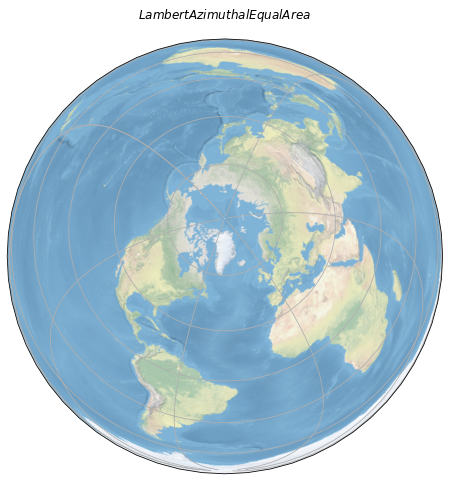

In [15]:
central_lon, central_lat = -40, 70

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertAzimuthalEqualArea(central_longitude=central_lon,
                                                          central_latitude=central_lat))
plt.title('$\it{Lambert Azimuthal Equal Area}$', fontweight="bold", pad=20)
ax.stock_img()
#ax.coastlines()
ax.gridlines()
plt.show()

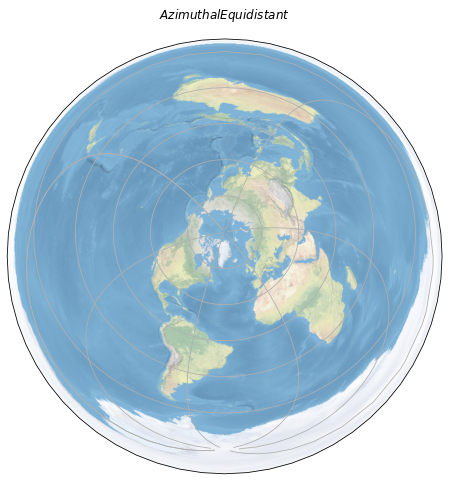

In [23]:
central_lon, central_lat = -40, 70

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=central_lon,
                                                          central_latitude=central_lat))
plt.title('$\it{Azimuthal Equidistant}$', fontweight="bold", pad=20)
ax.stock_img()
#ax.coastlines()
ax.gridlines()
plt.show()